# COMP47750: Assignment 2 Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, balanced_accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import DistanceMetric
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PolynomialFeatures, FunctionTransformer
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import FeatureUnion, make_pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import scipy.sparse
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

## Task 1

### Load the dataset into a dataframe that can be used for predicting  traffic_volume a day in advance.

In [3]:
df=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
df.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02/10/2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02/10/2012 10:00,4516


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
df['date_time']=pd.to_datetime(df['date_time'])

In [7]:
df.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516


In [8]:
df['year']=df['date_time'].dt.year
df['month']=df['date_time'].dt.month
df['hour']=df['date_time'].dt.hour
df['weekday']=df['date_time'].dt.dayofweek
df['quarter']=df['date_time'].dt.quarter

In [9]:
df.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,hour,weekday,quarter
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545,2012,2,9,4,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516,2012,2,10,4,1


In [10]:
df['holiday'].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [11]:
#encoding holiday to binary
def encode_units(x):
    if x=='None':
        return 0
    else:
        return 1
df['holiday']=df['holiday'].apply(encode_units)

In [12]:
df['holiday'].value_counts()

0    48143
1       61
Name: holiday, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  int64         
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   year                 48204 non-null  int64         
 10  month                48204 non-null  int64         
 11  hour                 48204 non-null  int64         
 12  weekday              48204 non-null  int64         
 13  quarter              48204 non-

In [14]:
# using 'holiday' and 'weekday'creating new feature called 'workingday' and encoding binary
def encode_units2(df):
    if df['holiday'] == 1 or df['weekday'] == 5 or df['weekday'] == 6:
        return 0
    else:
        return 1


df['workingday'] = df.apply(lambda df: encode_units2(df), axis=1)

In [15]:
df['workingday'].value_counts()

1    34413
0    13791
Name: workingday, dtype: int64

In [16]:
df.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,hour,weekday,quarter,workingday
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545,2012,2,9,4,1,1
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516,2012,2,10,4,1,1


In [17]:
df.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,hour,weekday,quarter,workingday
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.001265,281.205870,0.334264,0.000222,49.362231,3259.818355,2015.512426,6.537715,11.398162,3.001141,2.515766,0.713903
std,0.035551,13.338232,44.789133,0.008168,39.015750,1986.860670,1.893211,3.413871,6.940238,1.998085,1.101634,0.451940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,1193.000000,2014.000000,4.000000,5.000000,1.000000,2.000000,0.000000
50%,0.000000,282.450000,0.000000,0.000000,64.000000,3380.000000,2016.000000,7.000000,11.000000,3.000000,3.000000,1.000000
75%,0.000000,291.806000,0.000000,0.000000,90.000000,4933.000000,2017.000000,9.000000,17.000000,5.000000,3.000000,1.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,7280.000000,2018.000000,12.000000,23.000000,6.000000,4.000000,1.000000


### Produce some plots at different time-scales to see if there is periodicity in the traffic volume. 

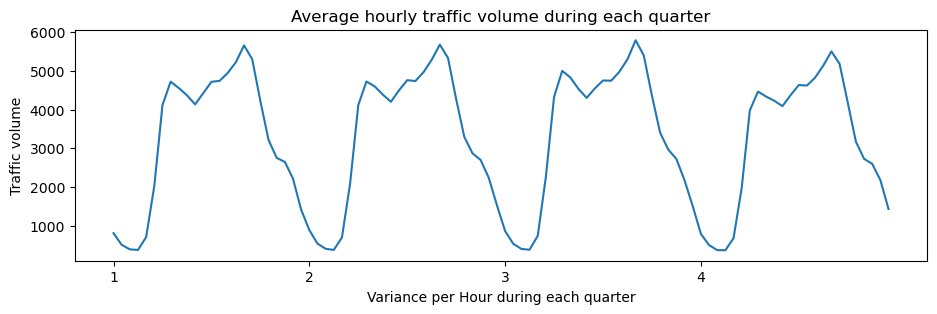

In [18]:
fig, ax = plt.subplots(figsize=(11, 3))
average_traffic_volume = df.groupby(["quarter",
                                     "hour"]).mean()["traffic_volume"]
average_traffic_volume.plot(ax=ax)
_ = ax.set(
    title="Average hourly traffic volume during each quarter",
    xticks=[i * 24 for i in range(4)],
    xticklabels=["1", "2", "3", "4"],
    xlabel="Variance per Hour during each quarter",
    ylabel="Traffic volume",
)

Quarterly variance of traffic volume in 24 hour is negligable. Periodicity of traffic volume in 24 hour almost the same every quarter. This feature won't be included in model 

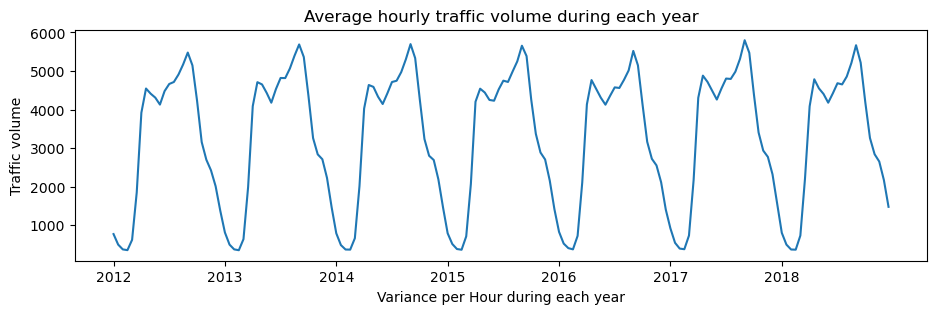

In [19]:
fig, ax = plt.subplots(figsize=(11, 3))
average_traffic_volume = df.groupby(["year", "hour"]).mean()["traffic_volume"]
average_traffic_volume.plot(ax=ax)
_ = ax.set(
    title="Average hourly traffic volume during each year",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["2012", "2013", "2014", "2015", "2016", "2017", "2018"],
    xlabel="Variance per Hour during each year",
    ylabel="Traffic volume",
)

Yearly variance of traffic volume in 24 hour is negligable. Periodicity of traffic volume in 24 hour almost the same every year. This feature won't be included in model  

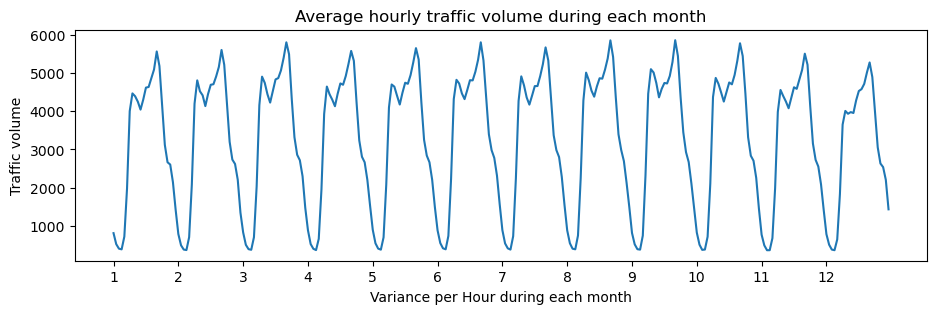

In [20]:
fig, ax = plt.subplots(figsize=(11, 3))
average_traffic_volume = df.groupby(["month", "hour"]).mean()["traffic_volume"]
average_traffic_volume.plot(ax=ax)
_ = ax.set(
    title="Average hourly traffic volume during each month",
    xticks=[i * 24 for i in range(12)],
    xticklabels=[
        "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"
    ],
    xlabel="Variance per Hour during each month",
    ylabel="Traffic volume",
)

Monthly variance of traffic volume in 24 hour is shows slight decrese in traffic volume during December.Periodicity of traffic volume in 24 hour almost the same every month with slight variations this feature will be included in model. 

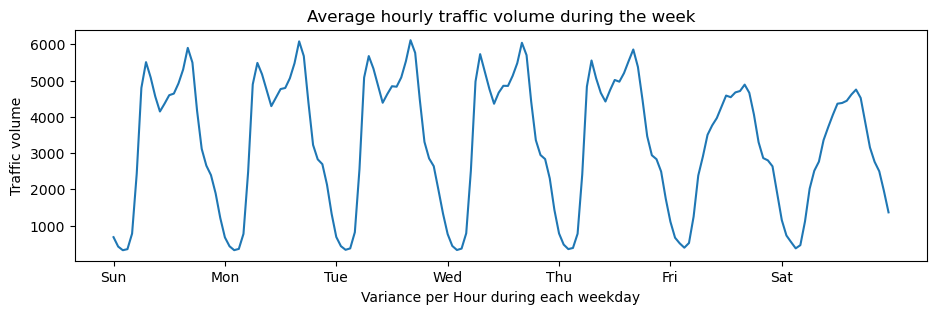

In [21]:
fig, ax = plt.subplots(figsize=(11, 3))
average_traffic_volume = df.groupby(["weekday",
                                     "hour"]).mean()["traffic_volume"]
average_traffic_volume.plot(ax=ax)
_ = ax.set(
    title="Average hourly traffic volume during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Variance per Hour during each weekday",
    ylabel="Traffic volume",
)

Daily variance of traffic volume in 24 hour shows decreese in traffic volume during the weekend.Periodicity can be clearly observed such that; traffic volume in 24 hour shows increase during mid day and decrease during night with minimum volume close to midnight everyday with similar pattern. This feature will be included in model

The target of the prediction problem is traffic volume on a hourly basis.

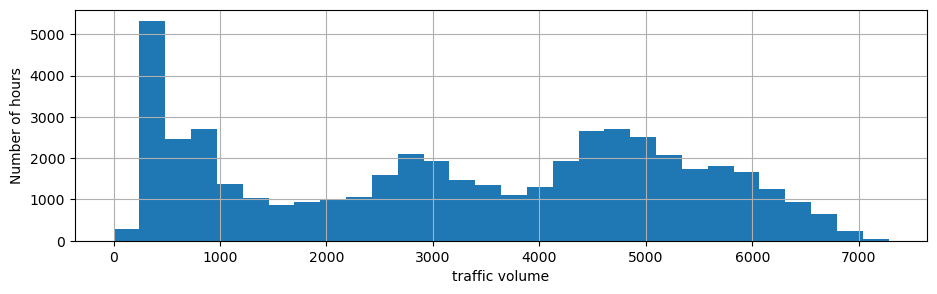

In [22]:
fig, ax = plt.subplots(figsize=(11, 3))
df["traffic_volume"].hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="traffic volume",
    ylabel="Number of hours",
)

According to above histogram, traffic volume occurring in between 250-500 is quite frequent in this dataset. Therefore MAE shouldn't be above 500 even though max traffic volume is 7280 with 1986 std. 

## Task 2

### Extract hour, day and month features from the time-stamps. & Divide the data into train and test sets keeping one third of the data for testing. 

* hour, day and month features are already extracted from the time-stamps at task 1.1. 
* I will check weather category features and evaluate feasibility, remove outlier classifiers based on frequency
* because encoding at this section is referred as "linear numeric encoding of the hour, day and month features" for this step I will ordinal encode category features.

In [23]:
df.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,hour,weekday,quarter,workingday
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545,2012,2,9,4,1,1
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516,2012,2,10,4,1,1


In [24]:
#I will not exclude weather_description from model and only keep weather_main as weather clasifier
df['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [25]:
df['weather_main'].value_counts(normalize=True) * 100

Clouds          31.457970
Clear           27.779852
Mist            12.343374
Rain            11.766658
Snow             5.966310
Drizzle          3.777695
Haze             2.821343
Thunderstorm     2.145050
Fog              1.891959
Smoke            0.041490
Squall           0.008298
Name: weather_main, dtype: float64

For the shake of better generalization accuracy at 'weather_main' category; I will only leave 5 main class by identifying classes with frequencies to below 5% of dataset as outlier and setting their values to NAN. After splits, I can impute them with kNN imputation.

In [26]:
df['weather_main_new'] = df['weather_main']
df.loc[(df['weather_main_new'] == 'Drizzle'), 'weather_main_new'] = np.NAN
df.loc[(df['weather_main_new'] == 'Haze'), 'weather_main_new'] = np.NAN
df.loc[(df['weather_main_new'] == 'Thunderstorm'), 'weather_main_new'] = np.NAN
df.loc[(df['weather_main_new'] == 'Fog'), 'weather_main_new'] = np.NAN
df.loc[(df['weather_main_new'] == 'Smoke'), 'weather_main_new'] = np.NAN
df.loc[(df['weather_main_new'] == 'Squall'), 'weather_main_new'] = np.NAN

In [27]:
df['weather_main_new'].value_counts(dropna=False,normalize=True) * 100

Clouds    31.457970
Clear     27.779852
Mist      12.343374
Rain      11.766658
NaN       10.685835
Snow       5.966310
Name: weather_main_new, dtype: float64

In [28]:
#ordinal encoding don't have any effect on test split.
#in order to ensure Nan stays Nan after ordinal encoding weather_main and can be imputed;
# encoding this feature Before splitting the dataset
#also hour, day and month already have ordinal values therefore no need to be encoded again.
le = OrdinalEncoder()
df['weather_main_new'] = le.fit_transform(df[['weather_main_new']])
df['weather_main_new']=df['weather_main_new'].astype('Int64')
df.loc[(df['weather_main_new'] == 5), 'weather_main_new'] = np.NAN
df['weather_main_new'].value_counts(dropna=False, normalize=True) * 100

1        31.45797
0       27.779852
2       12.343374
3       11.766658
<NA>    10.685835
4         5.96631
Name: weather_main_new, dtype: Float64

In [29]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'year', 'month',
       'hour', 'weekday', 'quarter', 'workingday', 'weather_main_new'],
      dtype='object')

In [30]:
df = df.drop([
    'date_time', 'holiday', 'weather_description', 'weather_main', 'quarter',
    'year'
],
             axis=1)

In [31]:
df.head(2)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,hour,weekday,workingday,weather_main_new
0,288.28,0.0,0.0,40,5545,2,9,4,1,1
1,289.36,0.0,0.0,75,4516,2,10,4,1,1


### Divide the data into train and test sets keeping one third of the data for testing. 

    Note: in order not to do imputing, scaling before splitting dataset. I will split dataset in to train -test-validation and do imputing-scaling separately on splits to avoid any effect tests set can have on train set weights. 

In [33]:
features=["temp","rain_1h","snow_1h","clouds_all","month","hour","weekday","workingday","weather_main_new"]

In [34]:
y = df[["traffic_volume"]]
X = df[features]
X_train, X_rem, y_train, y_rem = train_test_split(X,
                                                  y,
                                                  test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,
                                                    y_rem,
                                                    test_size=0.5)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
None

(33742, 9) (33742, 1)
(7231, 9) (7231, 1)
(7231, 9) (7231, 1)


### Build two different regression models and test the accuracy. Try Linear Regression and one other regression model from scikit learn. 

1. General Steps in pipelines:
    * step1: Imputing missing values in "weather_main_new" column. ( ın this step I took n_neighbors=1 for KNNImputer otherwise it will round up to a value between values of number of neighbors and I would have end up with undesired new classes)
    * step2: After imputing at step 1, input to step 2 is an array so converting it back to dataframe with original column names in order to be able to run column based transformation at step3. 
    * step3: One-hot-encoding "weather_main_new" column and applying minmaxscaler to remaining columns.
    * step4: using regression model as instructed in assignment.


2. The reason for doing preprocessing via pipeline:
    * In order to be able to avoid test dataset effecting model training and causing errors at estimating model performance, I did preprocessing and modeling in a pipe. So that I can easily apply all imputing, encoding,scaling, seperately to each split without any of them effected by another. 

#### Trying linear regression model

In [35]:
#https://datascience.stackexchange.com/questions/103077/how-can-i-get-the-dataframe-after-scikit-pipeline
#https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer
categorical_columns=["weather_main_new"]
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
kNN_Imputer=KNNImputer(n_neighbors=1)
names = X_train.columns.tolist()
Linearpipe = Pipeline(steps=[('imputer', kNN_Imputer),
                             ("pandarizer", FunctionTransformer(lambda x: pd.DataFrame(x, columns = names))),
                             ('encoder',  ColumnTransformer(
                                            transformers=[
                                                ("categorical", one_hot_encoder, categorical_columns),
                                            ],
                                            remainder=MinMaxScaler(),
                                        )),
                             ('model', LinearRegression())],
                      verbose=True)

In [36]:
Linearpipe.fit(X_train, y_train)
y_pred = Linearpipe.predict(X_test)

[Pipeline] ........... (step 1 of 4) Processing imputer, total=  11.8s
[Pipeline] ........ (step 2 of 4) Processing pandarizer, total=   0.0s
[Pipeline] ........... (step 3 of 4) Processing encoder, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing model, total=   0.0s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Checking if pipe works as intended.

In [37]:
Linearpipe_model_input= pd.DataFrame(
    Linearpipe.named_steps['encoder'].transform(X_test),
    columns=Linearpipe.named_steps['encoder'].get_feature_names_out().tolist())
Linearpipe_model_input.head(2)

,categorical__weather_main_new_0.0,categorical__weather_main_new_1.0,categorical__weather_main_new_2.0,categorical__weather_main_new_3.0,categorical__weather_main_new_4.0,remainder__temp,remainder__rain_1h,remainder__snow_1h,remainder__clouds_all,remainder__month,remainder__hour,remainder__weekday,remainder__workingday
0,0.0,1.0,0.0,0.0,0.0,0.843060,0.000000,0.0,0.20,0.727273,0.739130,1.000000,0.0
1,0.0,0.0,0.0,1.0,0.0,0.954315,0.000025,0.0,0.75,0.000000,0.086957,0.166667,1.0


In [38]:
Linearpipe_model_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7231 entries, 0 to 7230
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   categorical__weather_main_new_0.0  7231 non-null   float64
 1   categorical__weather_main_new_1.0  7231 non-null   float64
 2   categorical__weather_main_new_2.0  7231 non-null   float64
 3   categorical__weather_main_new_3.0  7231 non-null   float64
 4   categorical__weather_main_new_4.0  7231 non-null   float64
 5   remainder__temp                    7231 non-null   float64
 6   remainder__rain_1h                 7231 non-null   float64
 7   remainder__snow_1h                 7231 non-null   float64
 8   remainder__clouds_all              7231 non-null   float64
 9   remainder__month                   7231 non-null   float64
 10  remainder__hour                    7231 non-null   float64
 11  remainder__weekday                 7231 non-null   float

Spotted no problem

In [39]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print(
        '\n=============================================================================='
    )
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    print("RMSE: ",
          metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))

In [40]:
printMetrics(y_test,y_pred)


MAE:  1605.9480016595214
RMSE:  1827.9475746038042
R2:  0.14792367433761955


Simple Linear model performing very poorly. Due to periodic oscillatory nature of prediction target simple linear model won't fit well, can transform to polynomial features to better fit oscillatory periodic nature of our target. 

#### Trying Stochastic Gradient Descent regression model from scikit with polynomial transformation of degree 2

    Why Stochastic Gradient Descent?
* Linear regression is computationally cheap in univariate cases but for multivariate cases formulate gets complicated and require many calculations. Such that in this case, I will use polynomial features transformation and as the result feature interactions columns will be added to the array so matrix size which will input to ML regression method will greatly increase, then SGD will become computationally cheaper then linear regression thanks to its iterative method. 
* In gradient descent we take derivative of sum of squared residuals with respect to intercept and slope and plug in to step size formula multiply by learning rate and update intercept and slope till convergence so number of derivatives will be equal to number of features and number of terms for each derivative will be equal to sample size and since convergence will take around 1000 steps amount of calculation needed is huge and computation would be very slow. However, Stochastic gradient descent is much more efficient then gradient descent because it reduces amount of term calculates by factor of sample size as it will randomly pick one sample for each step and use that to calculate derivatives. 

In [41]:
SGD_pipe = Pipeline(steps=[('imputer', kNN_Imputer),  
                           ("pandarizer", FunctionTransformer(lambda x: pd.DataFrame(x, columns = names))),
                           ('encoder',  ColumnTransformer(
                                            transformers=[
                                                ("categorical", one_hot_encoder, categorical_columns),
                                            ],
                                            remainder=MinMaxScaler(),
                                        )),
                           ('trans', PolynomialFeatures(degree=2)),
                           ('model', SGDRegressor(max_iter=1000, tol=1e-3))],
                    verbose=True)

In [42]:
SGD_pipe.fit(X_train, y_train)
y_pred = SGD_pipe.predict(X_test)

[Pipeline] ........... (step 1 of 5) Processing imputer, total=   9.2s
[Pipeline] ........ (step 2 of 5) Processing pandarizer, total=   0.0s
[Pipeline] ........... (step 3 of 5) Processing encoder, total=   0.0s
[Pipeline] ............. (step 4 of 5) Processing trans, total=   0.0s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 5 of 5) Processing model, total=   2.6s


In [43]:
printMetrics(y_test,y_pred)


MAE:  891.7178134201271
RMSE:  1144.2514952639526
R2:  0.6661172329468632


As expected, Stochastic Gradient Descent regression model with polynomial transformation of degree 2 greatly increased prediction accuracy, particularly due to adding feature interactions using polynomial feature transformation but still given nature of dataset our MAE is high, our model needs further improvements by feature engineering.

## Task 3

### Given that the linear numeric encoding of the hour, day and month features may miss cyclical signals, investigate and test a cyclical strategy for encoding these features. Does this strategy improve accuracy for the models tested in Task 2?

* with referance to this case study https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html , I will try encoding cyclic categories(time features) using SplineTransformer using periodic_spline_transformer method descriped in case study. 
* Referances: https://pub.towardsai.net/time-series-analysis-hands-on-with-scikit-learn-feature-engineering-1e958e6534da Spine functions are combination of polynomial functions, joining points called knots, so we can model an area where data have significant change in direction as illustrated on graphs at task 1 using knots.This let us keep polynomial degree lower.

In [44]:
def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )

#### first trying cyclic_spline_transformer with simple linear regression

In [45]:
cyclic_spline_linearpipe = Pipeline(steps=[('imputer', kNN_Imputer),
                             ("pandarizer", FunctionTransformer(lambda x: pd.DataFrame(x, columns = names))),
                             ('encoder',  ColumnTransformer(
                                            transformers=[
                                                ("categorical", one_hot_encoder, ["weather_main_new"]),
                                                ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
                                                ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["weekday"]),
                                                ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
                                            ],
                                             sparse_threshold=0, remainder=MinMaxScaler(),
                                        )),
                             ('model', LinearRegression())],
                      verbose=True)

In [46]:
cyclic_spline_linearpipe.fit(X_train, y_train)
y_pred = cyclic_spline_linearpipe.predict(X_test)

[Pipeline] ........... (step 1 of 4) Processing imputer, total=   6.1s
[Pipeline] ........ (step 2 of 4) Processing pandarizer, total=   0.0s
[Pipeline] ........... (step 3 of 4) Processing encoder, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing model, total=   0.0s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
printMetrics(y_test,y_pred)


MAE:  626.9497994744848
RMSE:  890.4855597668213
R2:  0.7977889941988447


Yes. After encoding periodic time related features using spine transformation our simple linear model's prediction strength greatly increased.(R2 increased from 0.14 to 0.79 and MAE decreased from 1600 to 620) It perform even better then SGD model with degree 2 polynomial transformation (such that R2 at SGD without spline encoding was 0.66 and MAE was 891). In this model spline transformer generates basis spline functions of given polynomial order of degree( it was degree 3 in this case) from observations on single attribute for futures.Extrapolation="periodic" makes encoding stay smooth when extrapolating beyond midnight.

#### finalizing linear model by adding a new feature to model workingdays/hours interaction using poynomialfeatures class on spline encoded hours and workingdays 

    Source: https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#modeling-pairwise-interactions-with-splines-and-polynomial-features
Graphs at task 1 showed quarter and year make almost no difference to hourly traffic volume patterns however months have slight impact, days of week or more particularly weather day of week is a working day or not impacts traffic volume patterns. So I will create a new feature to model this interaction explicitly without introducing too many new variable. 

In [55]:
hour_workday_interaction = make_pipeline(
    ColumnTransformer(
        [
            ("cyclic_hour", periodic_spline_transformer(24, n_splines=8), ["hour"]),
            ("workingday", FunctionTransformer(lambda x: x == "True"), ["workingday"]),
        ]
    ),
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
)

In [56]:
cyclic_spline_linearpipe_interactions = Pipeline(steps=[('imputer', kNN_Imputer),
                             ("pandarizer", FunctionTransformer(lambda x: pd.DataFrame(x, columns = names))),
                            ('attrib_deriver', FeatureUnion([
                                ('encoder',  ColumnTransformer(
                                            transformers=[
                                                ("categorical", one_hot_encoder, categorical_columns),
                                                ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
                                                ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["weekday"]),
                                                ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
                                            ],
                                            remainder=MinMaxScaler(), verbose_feature_names_out=True
                                        )),
                             ("interactions1", hour_workday_interaction)])),
                             ('model', LinearRegression())],
                      verbose=True)

In [57]:
cyclic_spline_linearpipe_interactions.fit(X_train, y_train)
y_pred = cyclic_spline_linearpipe_interactions.predict(X_test)

[Pipeline] ........... (step 1 of 4) Processing imputer, total=   5.9s
[Pipeline] ........ (step 2 of 4) Processing pandarizer, total=   0.0s
[Pipeline] .... (step 3 of 4) Processing attrib_deriver, total=   0.1s
[Pipeline] ............. (step 4 of 4) Processing model, total=   0.1s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
printMetrics(y_test,y_pred)


MAE:  625.5329829899046
RMSE:  888.2470953314838
R2:  0.7988043351524385


#### Trying to encode periodic time related features using spine transformation on SGD with degree 3 polynomial transformation.

In [59]:
cyclic_spline_SGD_pipe = Pipeline(steps=[('imputer', kNN_Imputer),  
                           ("pandarizer", FunctionTransformer(lambda x: pd.DataFrame(x, columns = names))),
                             ('encoder',  ColumnTransformer(
                                            transformers=[
                                                ("categorical", one_hot_encoder, categorical_columns),
                                                ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
                                                ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["weekday"]),
                                                ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
                                            ],
                                            remainder=MinMaxScaler(), verbose_feature_names_out=True
                                        )),
                           ('trans', PolynomialFeatures(degree=2)),
                           ('model', SGDRegressor(max_iter=1000, tol=1e-3))],
                    verbose=True)

In [60]:
cyclic_spline_SGD_pipe.fit(X_train, y_train)
y_pred = cyclic_spline_SGD_pipe.predict(X_test)

[Pipeline] ........... (step 1 of 5) Processing imputer, total=   6.0s
[Pipeline] ........ (step 2 of 5) Processing pandarizer, total=   0.0s
[Pipeline] ........... (step 3 of 5) Processing encoder, total=   0.0s
[Pipeline] ............. (step 4 of 5) Processing trans, total=   0.1s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 5 of 5) Processing model, total=   3.2s


In [61]:
printMetrics(y_test,y_pred)


MAE:  482.2421517778826
RMSE:  776.8222290179415
R2:  0.8461156990776395


Yes. After encoding periodic time related features using spine transformation prediction strength of our SGD model with degree 2 polynomial transformation increased such that R2 was 0.66 increased to 0.846 and MAE decreased to 482. The reason why SGD performs better then linear regression is because polynomial transformation captures cross feature interactions better. And iterative nature of SGD makes it memory efficient enough for my computer to be able to handle matrix came out of polynomial feature transformation. In this case, firstly we expanded number of features for each periodic time related feature using spines transformer, secondly we expanded number of features using polynomial features, therefore we end up with quite a large matrix to use on predictive regression model. Thanks to iterative nature of SGD my computer was able to handle memory requirements for the calculation of that matrix. However, when I tried to include polynomial features transformation in addition to periodic spine transformation in my linear regression pipeline my computer couldn't handle memory requirement and kernel died . This showed SGD is more memory efficent

## Task 4

### Identify subsets of the features for this prediction task. These can be the same subset for all models or model-specific subsets. 

In [62]:
cyclic_spline_linearpipe_interactions.named_steps['model'].coef_.shape

(1, 76)

In [63]:
cyclic_spline_SGD_pipe.named_steps['model'].coef_.shape

(528,)

* For linear model prediction accuracy very slightly increased after adding a new feature for workingdays/hours interaction, which points high dimensionality therefore reduce impact of individual features. Result of final transformation for linear regression made us to have 76 coefficient in model which means we end up with 76 features so dimensionality is high.
* We don't need that  workingdays/hours interaction feature for  SGD model. Because with polynomial features transformation degree 2 SGD already model all future interaction up to second degree. Therefore creating new features to model feature interactions isn't meaningful. At the moment its dimensionality is already very high such that it have 528 coefficient.

#### investigating methods to reduce dimension

Firstly I will investigate useful features for both models using wrapper strategy on preprocessing input of pipeline. since both model are based on line fitting in essence, I don't need to worry about model bias for feature selection between SGD and LinearRegression. By the algorithms design if set of features increase LinearRegression efficiency it will increase SGD efficiency as well.

##### Extracting preprocessed datasets from pipeline for feature importance evaluation

In [64]:
Preprocessing  = Pipeline(steps=[('imputer', kNN_Imputer),
                             ("pandarizer", FunctionTransformer(lambda x: pd.DataFrame(x, columns = names))),
                             ('encoder',  ColumnTransformer(
                                            transformers=[
                                                ("categorical", one_hot_encoder, ["weather_main_new"]),
                                                ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
                                                ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["weekday"]),
                                                ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
                                            ],
                                             sparse_threshold=0, remainder=MinMaxScaler(),
                                        )),],
                      verbose=True)

In [65]:
Preprocessing.fit(X_train, y_train)

[Pipeline] ........... (step 1 of 3) Processing imputer, total=   5.7s
[Pipeline] ........ (step 2 of 3) Processing pandarizer, total=   0.0s
[Pipeline] ........... (step 3 of 3) Processing encoder, total=   0.0s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('pandarizer',
                 FunctionTransformer(func=<function <lambda> at 0x7f8d3388b160>)),
                ('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(), sparse_threshold=0,
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['weather_main_new']),
                                                 ('cyclic_month',
                                                  SplineTransformer(extrapolat...
       [12.]]),
                                                                    n_knots=7),
                                                  ['month']),
                                                 ('cyclic_weekday',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[0.        ],
       [2.33333333],
       [4.66666667],
       [7.        ]]),
                                                                    n_knots=4),
                                                  ['weekday']),
                                                 ('cyclic_hour',
                                                  SplineTransformer(extrapolation='periodic',
                                                                    knots=array([[ 0.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.],
       [14.],
       [16.],
       [18.],
       [20.],
       [22.],
       [24.]]),
                                                                    n_knots=13),
                                                  ['hour'])]))],
         verbose=True)

In [66]:
Preprocessing_output= Preprocessing.transform(X_train)

In [67]:
Preprocessing.named_steps['encoder'].output_indices_

{'categorical': slice(0, 5, None),
 'cyclic_month': slice(5, 11, None),
 'cyclic_weekday': slice(11, 14, None),
 'cyclic_hour': slice(14, 26, None),
 'remainder': slice(26, 31, None)}

In [68]:
categorical_column_names=['weather_main_new_'+str(x) for x in range(5)]
cyclic_month_column_names=['month_'+str(x) for x in range(6)]
cyclic_weekday_column_names=['week_'+str(x) for x in range(3)]
cyclic_hour_column_names=['hour_'+str(x) for x in range(12)]
remainder_column_names=['temp', 'rain_1h','snow_1h','clouds_all','workingday']
preprocessed_column_names=categorical_column_names+cyclic_month_column_names+cyclic_weekday_column_names+cyclic_hour_column_names+remainder_column_names

In [69]:
Preprocessing_output= pd.DataFrame(
    Preprocessing.named_steps['encoder'].transform(X_train),
    columns=preprocessed_column_names)
Preprocessing_output.head(2)

,weather_main_new_0,weather_main_new_1,weather_main_new_2,weather_main_new_3,weather_main_new_4,month_0,month_1,month_2,month_3,month_4,...,hour_7,hour_8,hour_9,hour_10,hour_11,temp,rain_1h,snow_1h,clouds_all,workingday
0,0.0,0.0,0.0,1.0,0.0,0.000000,0.020833,0.479167,0.479167,0.020833,...,0.479167,0.020833,0.0,0.0,0.0,0.883637,0.000025,0.0,0.01,1.0
1,1.0,0.0,0.0,0.0,0.0,0.479167,0.020833,0.000000,0.000000,0.020833,...,0.000000,0.000000,0.0,0.0,0.0,0.906948,0.000000,0.0,0.01,0.0


##### Checking feature importance using wrapper strategy for feature selection on preprocessed dataset

In [70]:
feature_groups = [
    categorical_column_names, cyclic_month_column_names,
    cyclic_weekday_column_names, cyclic_hour_column_names,
    ['temp'], ['rain_1h'],['snow_1h'],['clouds_all'],['workingday']
]
len(feature_groups)

9

In [71]:
feature_names=Preprocessing_output.columns
f_range = (2, Preprocessing_output.shape[1])
sfs_forward = SFS(LinearRegression(), 
                  k_features=8, 
                  forward=True, 
                  floating=False, 
                  verbose=1,
                  scoring='r2',
                  feature_groups=feature_groups,
                  cv=10, n_jobs = -1)

sfs_forward = sfs_forward.fit(Preprocessing_output, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.4s finished
Features: 1/8[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.1s finished
Features: 2/8[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.9s finished
Features: 3/8[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished
Features: 4/8[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out 

In [72]:
print(sfs_forward.k_feature_idx_)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30)


In [73]:
print(sfs_forward.k_feature_names_)

('weather_main_new_0', 'weather_main_new_1', 'weather_main_new_2', 'weather_main_new_3', 'weather_main_new_4', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'week_0', 'week_1', 'week_2', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'temp', 'snow_1h', 'clouds_all', 'workingday')


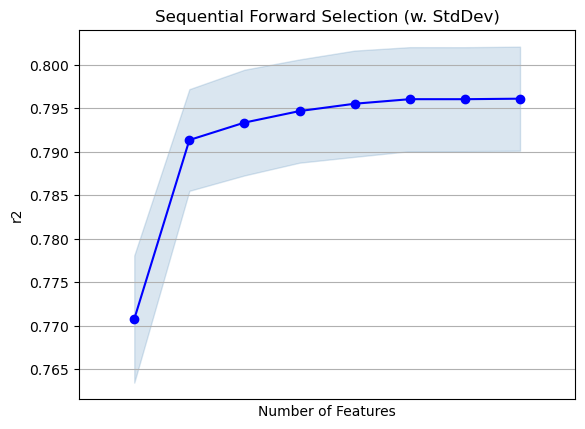

In [74]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs_forward.get_metric_dict(), 
                ylabel='r2',
                kind='std_dev')
plt.xlim([0, 9])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

Above graph shows that among 9 feature groups having up to first 6 is useful remaining 3 have no impact therefore I will extract  first 6 feature group. 

##### Extracting important features

In [75]:
feature_names=Preprocessing_output.columns
f_range = (2, Preprocessing_output.shape[1])
sfs_forward = SFS(LinearRegression(), 
                  k_features=6, 
                  forward=True, 
                  floating=False, 
                  verbose=1,
                  scoring='r2',
                  feature_groups=feature_groups,
                  cv=10, n_jobs = -1)

sfs_forward = sfs_forward.fit(Preprocessing_output, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 1/6[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s finished
Features: 2/6[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
Features: 3/6[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
Features: 4/6[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out 

In [76]:
print(sfs_forward.k_feature_names_)

('weather_main_new_0', 'weather_main_new_1', 'weather_main_new_2', 'weather_main_new_3', 'weather_main_new_4', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'week_0', 'week_1', 'week_2', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'temp', 'workingday')


##### Selecting important features and re-splitting data to include only the important features

In [77]:
features=["temp","month","hour","weekday","workingday","weather_main_new"]
y = df[["traffic_volume"]]
X = df[features]
X_train, X_rem, y_train, y_rem = train_test_split(X,
                                                  y,
                                                  test_size=0.3,
                                                  random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,
                                                    y_rem,
                                                    test_size=0.5,
                                                    random_state=1)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
None

(33742, 6) (33742, 1)
(7231, 6) (7231, 1)
(7231, 6) (7231, 1)


##### Testing models with new feature sets

In [78]:
names = X_train.columns.tolist()
cyclic_spline_linearpipe_interactions.fit(X_train, y_train)
y_pred = cyclic_spline_linearpipe_interactions.predict(X_test)
printMetrics(y_test,y_pred)

[Pipeline] ........... (step 1 of 4) Processing imputer, total=   8.5s
[Pipeline] ........ (step 2 of 4) Processing pandarizer, total=   0.0s
[Pipeline] .... (step 3 of 4) Processing attrib_deriver, total=   0.1s
[Pipeline] ............. (step 4 of 4) Processing model, total=   0.1s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



MAE:  640.1656928502282
RMSE:  906.3160094808914
R2:  0.7921415858835307


In [79]:
print(f"linear model number of coefficents {cyclic_spline_linearpipe_interactions.named_steps['model'].coef_.shape}")

linear model number of coefficents (1, 73)


Performance of final linear model very slightly increased(It was MAE:  640.63 before now MAE is 640.25 ) which proved last 3 feature didn't had any positive contribution in model efficiency, instead due to high dimensionality they had slight negative impact on the model.

In [80]:
cyclic_spline_SGD_pipe.fit(X_train, y_train)
y_pred = cyclic_spline_SGD_pipe.predict(X_test)
printMetrics(y_test,y_pred)

[Pipeline] ........... (step 1 of 5) Processing imputer, total=   8.4s
[Pipeline] ........ (step 2 of 5) Processing pandarizer, total=   0.0s
[Pipeline] ........... (step 3 of 5) Processing encoder, total=   0.0s
[Pipeline] ............. (step 4 of 5) Processing trans, total=   0.1s


/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/pelin/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 5 of 5) Processing model, total=   5.8s

MAE:  495.42740929972274
RMSE:  805.5782596000925
R2:  0.8357808572196368


In [81]:
print(f"sgd model number of coefficents{cyclic_spline_SGD_pipe.named_steps['model'].coef_.shape}")

sgd model number of coefficents(435,)


Performance of SGD almost didn't change very slight variations after decimal can be due to picking random sample at each step so it would be wrong to note down small improvement on RMSE and R2 for SGD but result proved last 3 feature didn't had any positive contribution in model efficiency. Furthermore, removing those 3 feature reduced number of coefficent in SGD model from 528 to 435 and improved its scalability.

##### Validating results

All feature engineering performed by testing models on test dataset to optimize so far. Therefore, it might be effected from test data set over fit it and might include bias. In order to validate model performance, I will test the  models on validation dataset to see results and confirm there is no over fitting and approach is truely viable. 

In [82]:
y_valid_pred_linear = cyclic_spline_linearpipe_interactions.predict(X_valid)
printMetrics(y_valid,y_valid_pred_linear)


MAE:  625.4451320702531
RMSE:  892.8737540039634
R2:  0.7993801060035376


In [83]:
y_valid_pred_sgd = cyclic_spline_SGD_pipe.predict(X_valid)
printMetrics(y_valid,y_valid_pred_sgd)


MAE:  480.5648431008701
RMSE:  779.8772095270493
R2:  0.8469454162480897


It is confirmed that both model perform as good in fully independent dataset while there is no bias so they didn't overfit and they are consistent. Secondly it is confirmed that SGD model succeed on archiving a desired MAE target and can be the more viable option for this prediction task. 